In [1]:
import pandas as pd

pd.__version__


'2.0.3'

In [2]:
gender_submission=pd.read_csv("gender_submission.csv")
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
gender_submission.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [4]:
gender_submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [5]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
gender_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [7]:
gender_submission.index

RangeIndex(start=0, stop=418, step=1)

In [8]:
len(gender_submission)

418

In [9]:
gender_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
gender_submission.tail(5)

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [11]:
gender_submission.loc[5]

PassengerId    897
Survived         0
Name: 5, dtype: int64

In [12]:
import matplotlib.pyplot as plt

<Axes: xlabel='PassengerId', ylabel='Survived'>

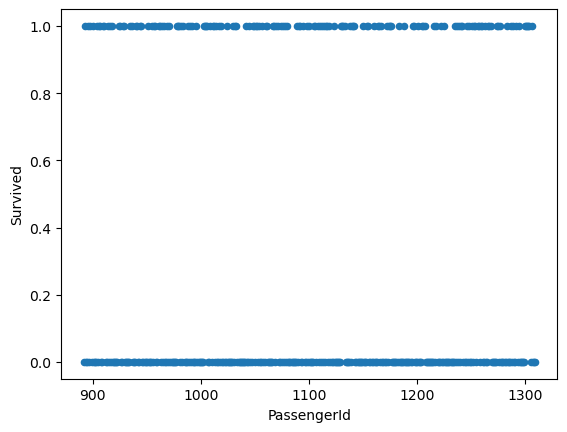

In [13]:
gender_submission.plot(kind="scatter",x="PassengerId",y="Survived")

<Axes: ylabel='Frequency'>

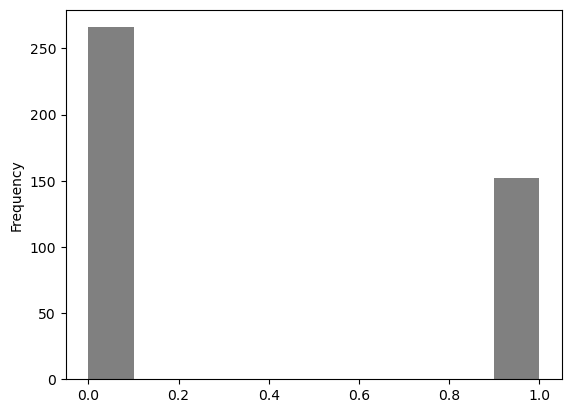

In [14]:
gender_submission["Survived"].plot(kind="hist",color="gray")

In [15]:
# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission_data = pd.read_csv('gender_submission.csv')

# Display the first few rows of each dataset
print("Train data:")
print(train_data.head())

print("\nTest data:")
print(test_data.head())

print("\nGender submission data:")
print(gender_submission_data.head())


Train data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN  

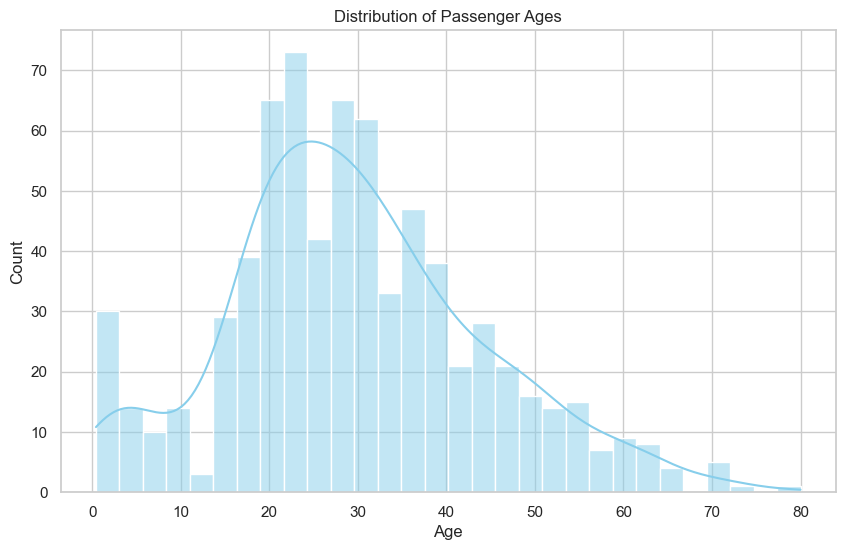

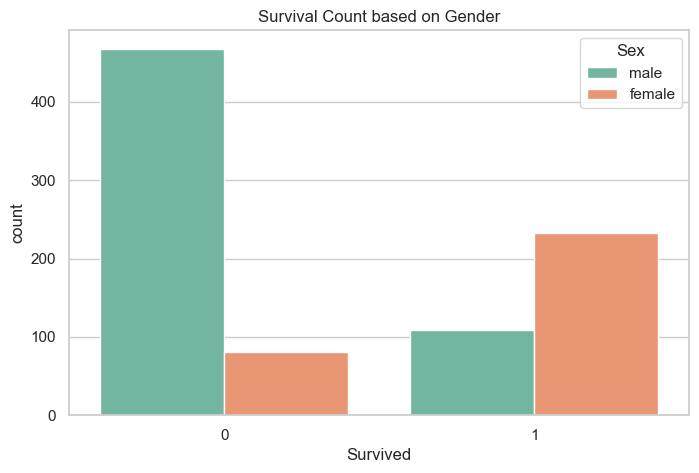

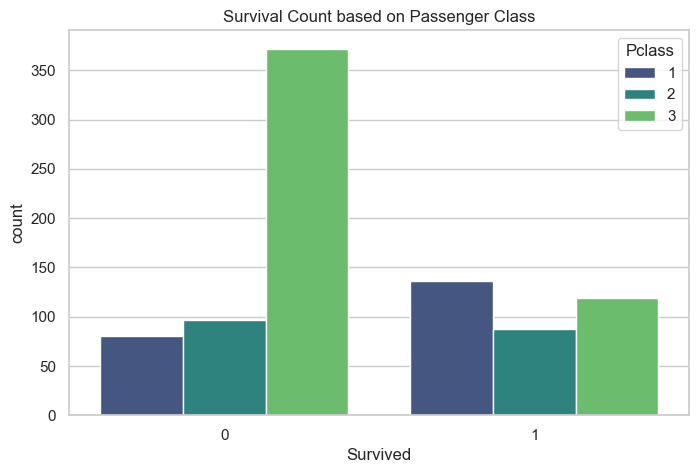

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot to show the distribution of passenger ages
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.show()

# Countplot to show the number of survivors based on gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=train_data, palette='Set2')
plt.title('Survival Count based on Gender')
plt.show()

# Countplot to show the number of survivors based on passenger class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=train_data, palette='viridis')
plt.title('Survival Count based on Passenger Class')
plt.show()


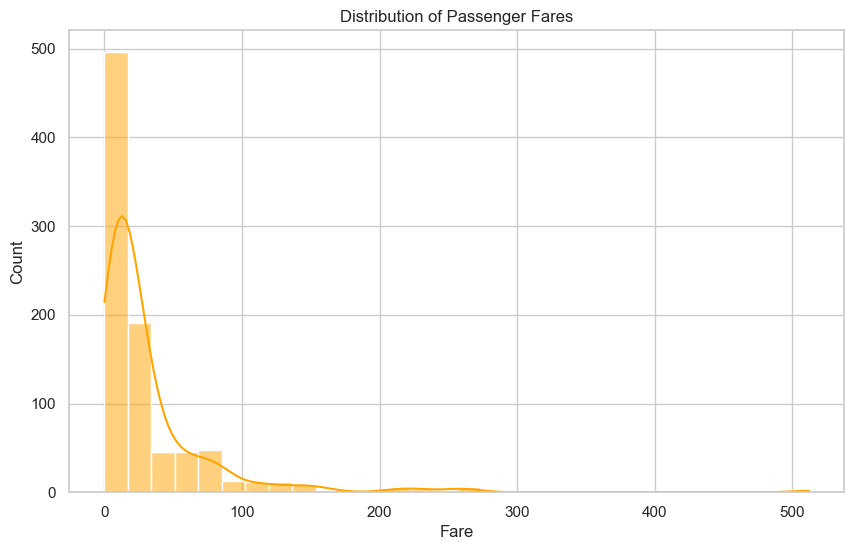

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], bins=30, kde=True, color='orange')
plt.title('Distribution of Passenger Fares')
plt.xlabel('Fare')
plt.show()


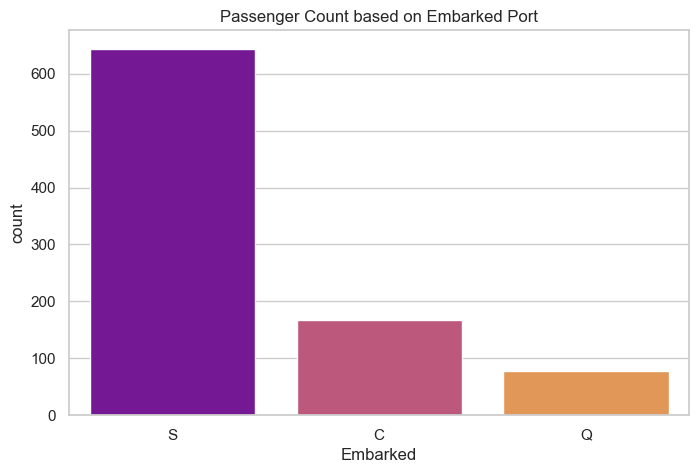

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Embarked', data=train_data, palette='plasma')
plt.title('Passenger Count based on Embarked Port')
plt.show()


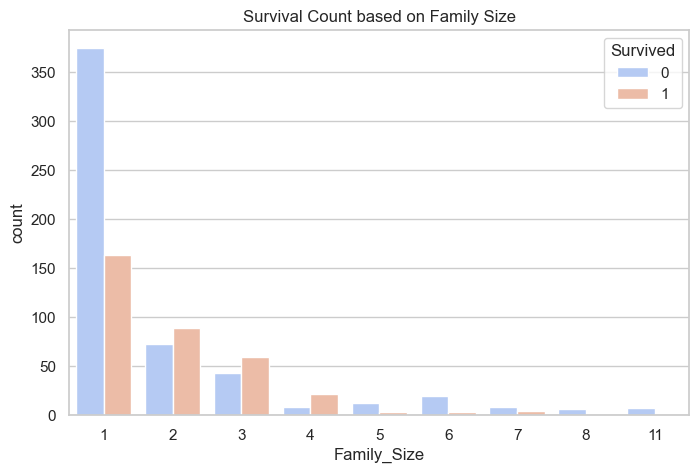

In [19]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch'] + 1
plt.figure(figsize=(8, 5))
sns.countplot(x='Family_Size', hue='Survived', data=train_data, palette='coolwarm')
plt.title('Survival Count based on Family Size')
plt.show()


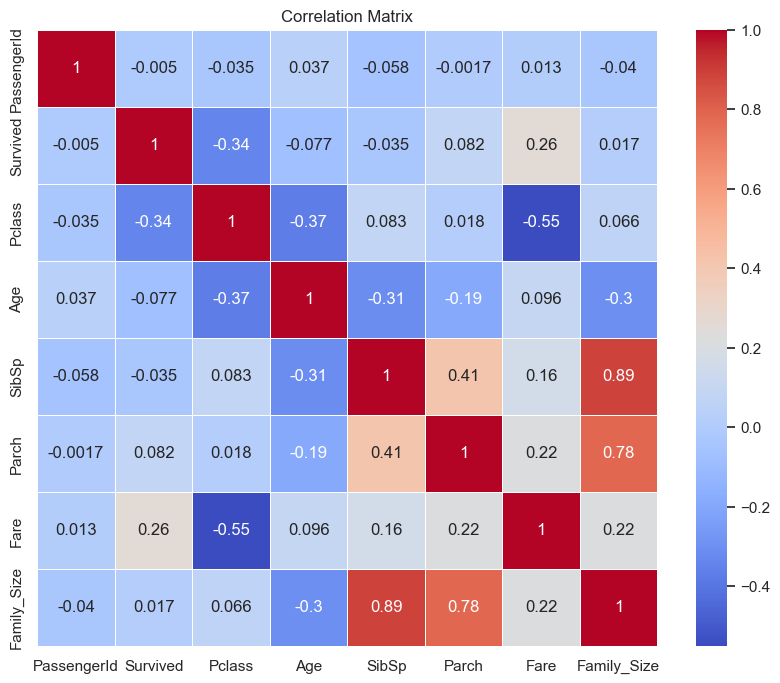

In [22]:
import numpy as np
# Selecting only numeric columns
numeric_columns = train_data.select_dtypes(include=[np.number])

# Creating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'train_data' is your DataFrame containing the Titanic dataset
# Selecting relevant features (independent variables) and the target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

# Handling categorical variables (converting 'Sex' to numeric)
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})

# Handling missing values (you can customize this based on your dataset)
train_data = train_data.dropna(subset=features + [target])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_data[features], train_data[target], test_size=0.2, random_state=42
)

# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


Accuracy: 0.75

Confusion Matrix:
[[71 16]
 [20 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143



C:\Users\pmoha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
